# <span style="color:red"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue"> Esercitazione 1 </span>

Test the Pseudo-Random Number generator by estimating the integer: $\langle r \rangle = \int_0^1 r dr$. Compute average and Standard deviation with a large number of throws, $M$, as a function of the number of blocks, $N$. This statistic instrument spoil Central Limit theorem.

## Exercise 1.1

In [58]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.optimize import curve_fit
from scipy.stats import norm

M=10000
N=100
n_bins = 50
teo_chi = 100
b = 10

###  1.1.1
First plot show $\langle r \rangle$ and its Standard Deviation of the mean as a function of the number of blocks, $N$</font>.

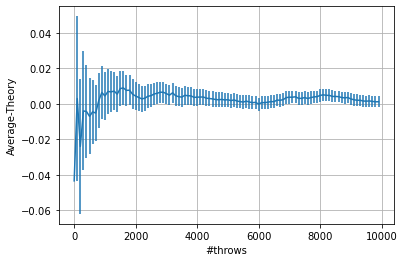

In [24]:
sum_prog, err_prog = np.loadtxt("../dati/dati1/dati1.1.1.dat", usecols=(0,1), delimiter=',', unpack='true')

x = np.arange(N)*M/N

plt.errorbar(x,sum_prog-0.5,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('Average-Theory')
plt.grid(True)
plt.show()

### Exercise 1.1.2
The second picture show the estimation of $\sigma^2$ and its uncertainty given by $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$.

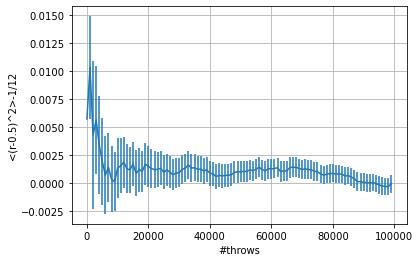

In [2]:
sum_prog, err_prog = np.loadtxt("../dati/dati1/dati1.1.2.dat", usecols=(0,1), delimiter=',', unpack='true')

x = np.arange(100)*M/N

plt.errorbar(x,sum_prog-1/12,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

### Exercise 01.1.3
Test about pseudo-random uniform distribution of the Pseudo-Random Number generator . Compute 100 values of $\chi^2$:

$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$

$\chi^2$ values waves around 100.

The picture show 100 values of $\chi^2$ less theory expectation.

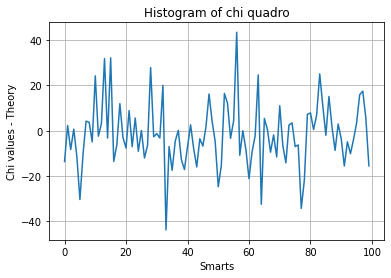

In [3]:
chi_prog = np.loadtxt("../dati/dati1/dati1.1.3.dat", usecols=(0), delimiter=',', unpack='true')

# the histogram of the data
#chi_pro-g, bins, patches = plt.hist(chi_prog, n_bins, density=True)
plt.plot(chi_prog-teo_chi)
plt.xlabel('Smarts')
plt.ylabel('Chi values - Theory')
plt.title('Histogram of chi quadro')
plt.grid(True)
plt.show()

### Exercise 1.2

In [66]:
def f(x,mu,sigma):  # defining the fitting function
    return np.exp(-(x-mu)*(x-mu)/(2*sigma*sigma))/(np.sqrt(2*np.pi*sigma+sigma))

In [46]:
len(np.arange(-b,b,1/N))
date = np.loadtxt("../dati/dati1/dati1.2.1.dat", usecols=(0,1,2,3), delimiter=',', unpack='false')

np.arange(-b,b+1,2*b/100)

array([-1.00000000e+01, -9.80000000e+00, -9.60000000e+00, -9.40000000e+00,
       -9.20000000e+00, -9.00000000e+00, -8.80000000e+00, -8.60000000e+00,
       -8.40000000e+00, -8.20000000e+00, -8.00000000e+00, -7.80000000e+00,
       -7.60000000e+00, -7.40000000e+00, -7.20000000e+00, -7.00000000e+00,
       -6.80000000e+00, -6.60000000e+00, -6.40000000e+00, -6.20000000e+00,
       -6.00000000e+00, -5.80000000e+00, -5.60000000e+00, -5.40000000e+00,
       -5.20000000e+00, -5.00000000e+00, -4.80000000e+00, -4.60000000e+00,
       -4.40000000e+00, -4.20000000e+00, -4.00000000e+00, -3.80000000e+00,
       -3.60000000e+00, -3.40000000e+00, -3.20000000e+00, -3.00000000e+00,
       -2.80000000e+00, -2.60000000e+00, -2.40000000e+00, -2.20000000e+00,
       -2.00000000e+00, -1.80000000e+00, -1.60000000e+00, -1.40000000e+00,
       -1.20000000e+00, -1.00000000e+00, -8.00000000e-01, -6.00000000e-01,
       -4.00000000e-01, -2.00000000e-01, -3.55271368e-14,  2.00000000e-01,
        4.00000000e-01,  

In [47]:
 np.arange(-b,b,2*b/100)
len(date[3])

10000

0.5446598529815674 0.0
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


/tmp/ipykernel_4709/4275679184.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-(x-mu)*(x-mu)/(2*sigma*sigma))/(np.sqrt(2*np.pi*sigma+sigma))
/tmp/ipykernel_4709/4275679184.py:2: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(-(x-mu)*(x-mu)/(2*sigma*sigma))/(np.sqrt(2*np.pi*sigma+sigma))


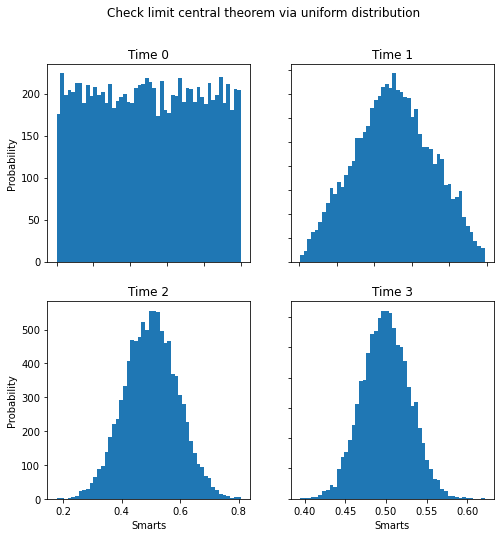

In [67]:

data = np.loadtxt("../dati/dati1/dati1.2.1.dat", usecols=(0,1,2,3), delimiter=',', unpack='false')

# the histogram of the data


fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Check limit central theorem via uniform distribution')

count = 0
for ax in axs:
    for a in ax:
        _, bins,_ = a.hist(data[count], n_bins, density=False)
        a.set_title(f'Time {count}')
        count = count+1

for ax in axs.flat:
    ax.set(xlabel='Smarts', ylabel='Probability')
    ax.label_outer()

mu, sigma = norm.fit(data[1,1])
print(mu,sigma)
best_fit_line = f(bins, mu, sigma)
plt.plot(bins, best_fit_line)
print(best_fit_line)

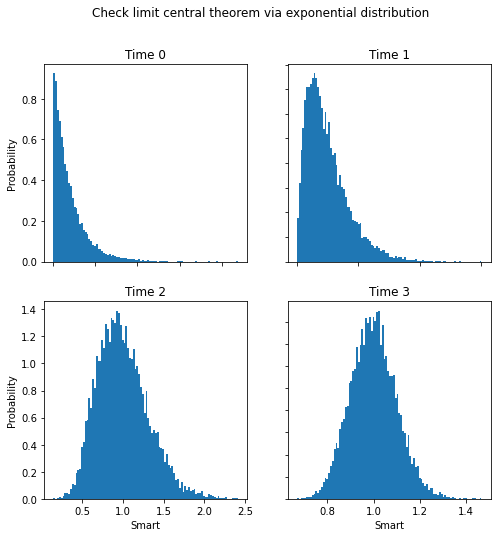

In [5]:
date = np.loadtxt("../dati/dati1/dati1.2.2.dat", usecols=(0,1,2,3), delimiter=',', unpack='true')
# the histogram of the data
fig, axs = plt.subplots(2, 2,figsize=(8,8))

fig.suptitle('Check limit central theorem via exponential distribution')
count = 0
for ax in axs:
    for a in ax:
        a.hist(date[count], n_bins, density=True)
        a.set_title(f'Time {count}')
        count = count+1
,y_fit
for ax in axs.flat:
    ax.set(xlabel='Smart', ylabel='Probability')
    ax.label_outer()

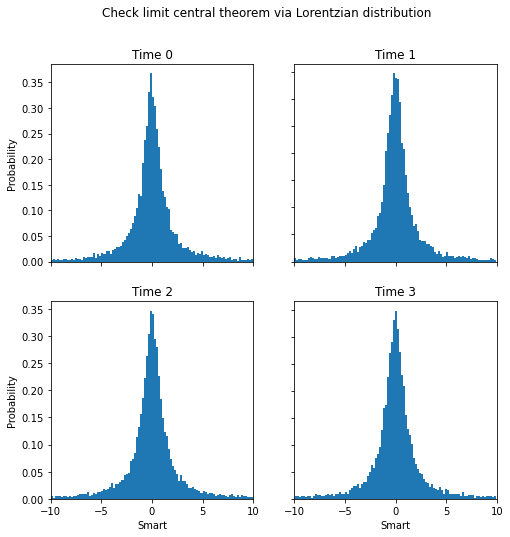

In [13]:
date = np.loadtxt("../dati/dati1/dati1.2.3.dat", usecols=(0,1,2,3), delimiter=',', unpack='True')
# the histogram of the data
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Check limit central theorem via Lorentzian distribution')
count = 0
for ax in axs:
    for a in ax:
        #seleziono solo gli elementi compresi tra -b e b per non dovere usare un numero esorbitante di bins
        a.hist([x for x in date[count] if abs(x) < b], n_bins, density=True)
        a.set_title(f'Time {count}')
        a.set_xlim(-b,b)
        count = count+1

for ax in axs.flat:
    ax.set(xlabel='Smart', ylabel='Probability')
    ax.label_outer()

### Exercise 01.3
Simulation the Buffon’s experiment

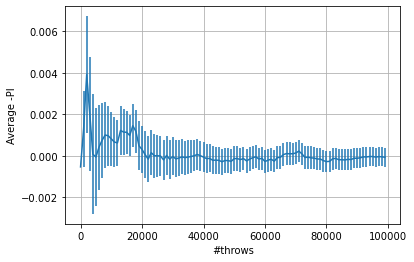

In [23]:
sum_prog, err_prog = np.loadtxt("../dati/dati1/dati1.3.dat", usecols=(0,1), delimiter=',', unpack='true')

x = np.arange(N)*M/N
teo = np.ones(N)*4*np.arctan(1)
plt.errorbar(x,sum_prog-teo,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('Average -PI')
plt.grid(True)
plt.show()